# Exploratory Data Analysis

In [1]:
import matplotlib.pylab as plt
import numpy as np
import nibabel as nib # For loading Nifti images
import os
import glob

In [2]:
data_path = "C:\\Users\\rober\\OneDrive\\Documents\\Datasets\\CC359\\Original\\" # Images' path
masks_path = "C:\\Users\\rober\\OneDrive\\Documents\\Datasets\\CC359\\STAPLE\\" # Brain segmentations' path
source_domain = ["philips_15", "siemens_15","ge_15"] # 1.5 T images
target_domain = ["philips_3", "siemens_3","ge_3"] # 3 T images

In [3]:
# Min-max dimensions and intensities source domain
dims_s = [ ]
min_max_s = []
regex = data_path +"*_15_*.nii.gz"
imgs_list = glob.glob(regex)

for ii in imgs_list:
    vol = nib.load(ii).get_fdata()
    dims_s.append(vol.shape)
    min_max_s.append((vol.min(),vol.max()))  

dims_s = np.asarray(dims_s) # COnvert list to array
min_max_s = np.asarray(min_max_s)

print("Min dimensions:")
print(dims_s.min(axis = 0))
print("Max dimensions:")
print(dims_s.max(axis = 0))
print("Min-max values:")
print(min_max_s.min(),min_max_s.max())

Min dimensions:
[150 168 256]
Max dimensions:
[256 288 288]
Min-max values:
0.0 12833.0


In [5]:
# Min-max dimensions and intensities target domain
dims_t = [ ]
min_max_t = []

regex = data_path +"*_3_*.nii.gz"
imgs_list = glob.glob(regex)

for ii in imgs_list:
    vol = nib.load(ii).get_fdata()
    dims_t.append(vol.shape)
    min_max_t.append((vol.min(),vol.max()))

dims_t = np.asarray(dims_t) # COnvert list to array
min_max_t = np.asarray(min_max_t)

print("Min dimensions:")
print(dims_t.min(axis = 0))
print("Max dimensions:")
print(dims_t.max(axis = 0))
print("Min-max values:")
print(min_max_t.min(),min_max_t.max())

Min dimensions:
[164 224 224]
Max dimensions:
[224 256 256]
Min-max values:
0.0 2465654.3884277344


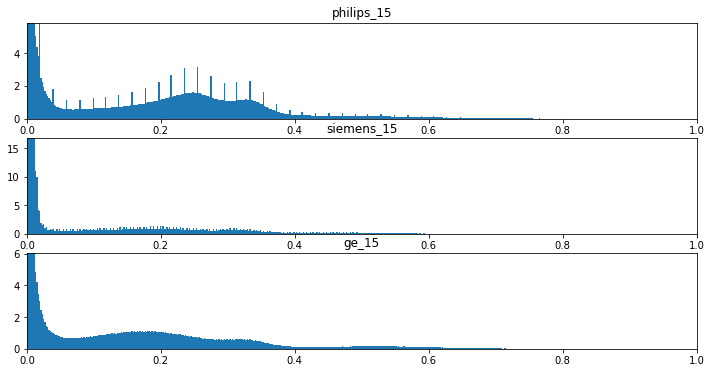

In [28]:
b = 500
# Sample histograms source domain
plt.figure(figsize = (12,6))
for (c,ii) in enumerate(source_domain):
    source_domain_sample = glob.glob(data_path + "*" + ii +"*")[0]
    img = nib.load(source_domain_sample).get_fdata()
    img = img/img.max()
    plt.subplot(3,1,c+1)
    n,bins, patches = plt.hist(img.flatten(), bins=b, range=(0, 1),density = True)
    plt.xlim(0,1)
    plt.ylim(0,n[5])
    plt.title(ii)
plt.show()

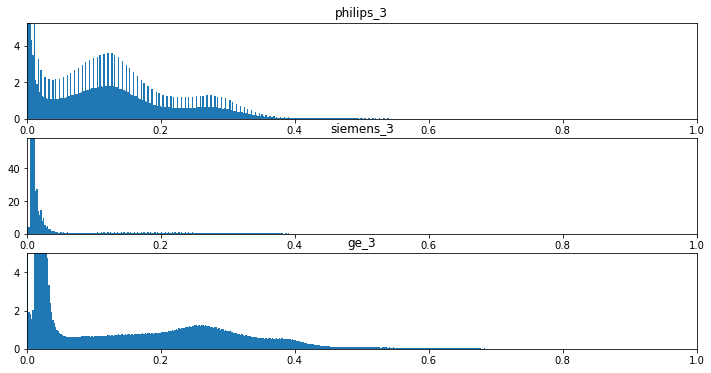

In [29]:
# Sample histograms target domain
plt.figure(figsize = (12,6))
for (c,ii) in enumerate(target_domain):
    source_domain_sample = glob.glob(data_path + "*" + ii +"*")[0]
    img = nib.load(source_domain_sample).get_fdata()
    img = img/img.max()
    plt.subplot(3,1,c+1)
    n,bins, patches = plt.hist(img.flatten(), bins=b, range=(0, 1),density = True)
    plt.xlim(0,1)
    plt.ylim(0,n[5])
    plt.title(ii)
plt.show()

<Figure size 864x432 with 0 Axes>

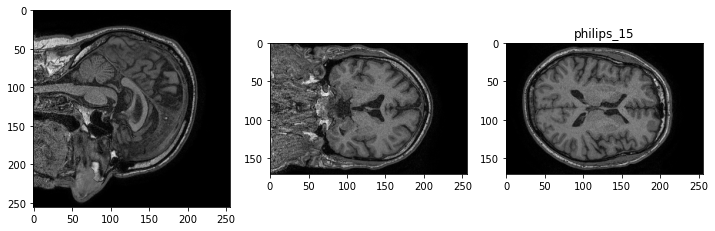

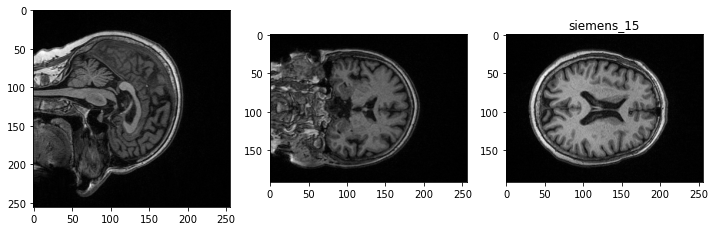

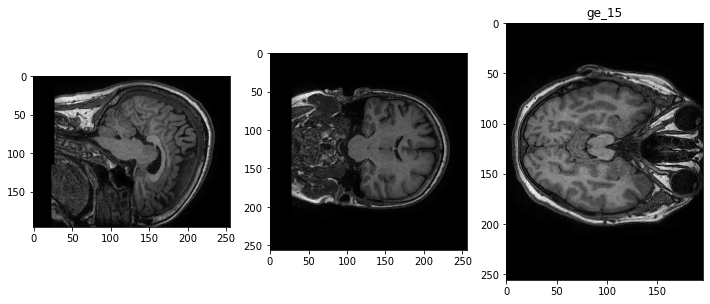

In [34]:
plt.figure(figsize = (12,6))
for (c,ii) in enumerate(source_domain):
    source_domain_sample = glob.glob(data_path + "*" + ii +"*")[0]
    img = nib.load(source_domain_sample).get_fdata()
    H,W,Z = img.shape
    img = img/img.max()
    plt.figure(figsize = (12,6))
    plt.subplot(1, 3, 1)
    plt.imshow(img[H//2], cmap = "gray")
    plt.subplot(1, 3, 2)
    plt.imshow(img[:,W//2,:], cmap = "gray")
    plt.subplot(1, 3, 3)
    plt.imshow(img[:,:,Z//2], cmap = "gray")
    plt.title(ii)
    plt.show()

<Figure size 864x432 with 0 Axes>

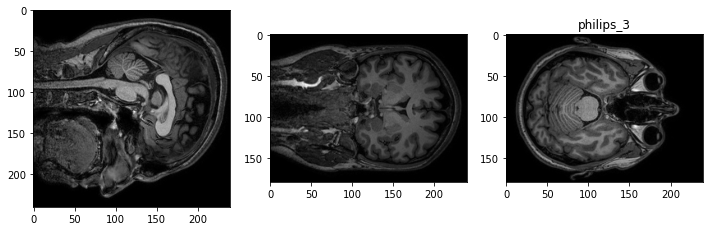

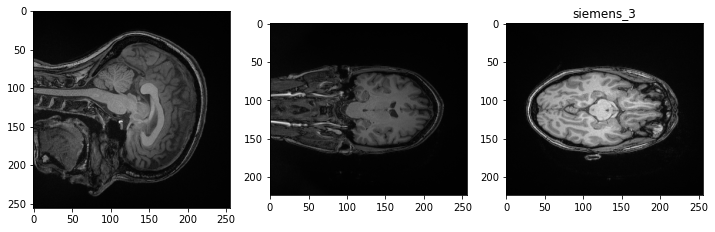

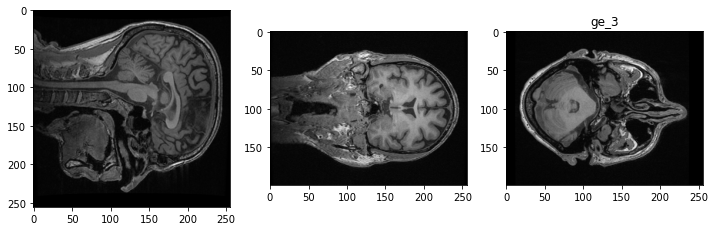

In [35]:
plt.figure(figsize = (12,6))
for (c,ii) in enumerate(target_domain):
    source_domain_sample = glob.glob(data_path + "*" + ii +"*")[0]
    img = nib.load(source_domain_sample).get_fdata()
    H,W,Z = img.shape
    img = img/img.max()
    plt.figure(figsize = (12,6))
    plt.subplot(1, 3, 1)
    plt.imshow(img[H//2], cmap = "gray")
    plt.subplot(1, 3, 2)
    plt.imshow(img[:,W//2,:], cmap = "gray")
    plt.subplot(1, 3, 3)
    plt.imshow(img[:,:,Z//2], cmap = "gray")
    plt.title(ii)
    plt.show()